In [ ]:
# dataset - https://drive.google.com/file/d/1LolmZ7NMAz9p9xyfaHYyrrjpbGuaUxKv/view?usp=drive_link

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/employee_performance.csv')


data.shape

(200, 7)

In [6]:
data.head()

,EmployeeID,Age,Department,Salary,JobSatisfaction,YearsAtCompany,PerformanceScore
0,1,29.0,IT,48715.88,4.0,24,45.71
1,2,42.0,HR,45343.35,3.0,25,70.81
2,3,22.0,Sales,50585.09,3.0,7,80.36
3,4,29.0,Finance,73479.97,1.0,6,66.19
4,5,50.0,HR,54049.76,2.0,24,72.11


In [7]:
# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2),
                            columns = ['Missing_percent'])
# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)

# Concatinating the above dataframe
data_concat = pd.concat([data_type, data_missing, sample_data], axis=1)

# Renaming the dataframe columns
data_concat.rename(columns = {0: 'Column_1',
                              1: 'Column_2'}, inplace = True)
data_concat

,Data_type,Missing_percent,Column_1,Column_2
EmployeeID,int64,0.0,1,2
Age,float64,5.0,29.0,42.0
Department,object,0.0,IT,HR
Salary,float64,4.5,48715.88,45343.35
JobSatisfaction,float64,3.0,4.0,3.0
YearsAtCompany,int64,0.0,24,25
PerformanceScore,float64,0.0,45.71,70.81


In [10]:
# univariate analysis
data['Age'].describe()b

,Age
count,190.000000
mean,39.694737
std,10.754670
min,22.000000
25%,30.000000
50%,40.000000
75%,48.000000
max,59.000000


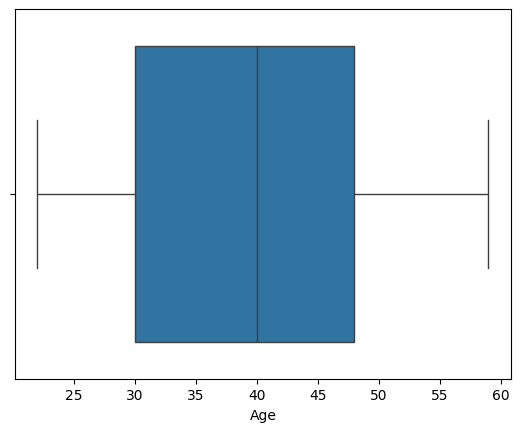

In [14]:
sns.boxplot(data["Age"], orient='h')
plt.show()

In [15]:
data['Salary'].describe()

,Salary
count,191.000000
mean,53239.595079
std,16006.512174
min,25477.350000
25%,45532.715000
50%,51260.950000
75%,58808.725000
max,143679.000000


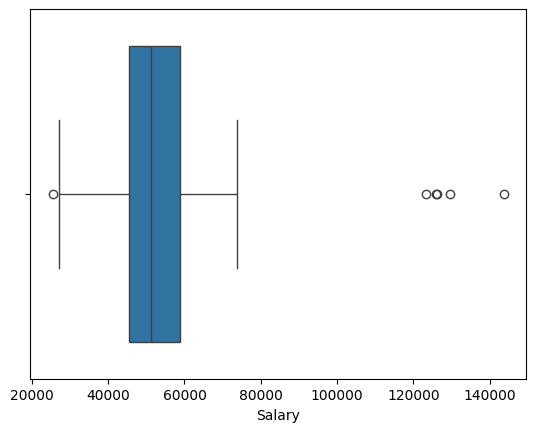

In [16]:
sns.boxplot(data["Salary"], orient='h')
plt.show()

In [18]:
data.groupby('Department')['Salary'].median()

,Salary
Department,
Finance,50353.050
HR,53827.975
IT,48981.420
Marketing,51660.880
Sales,54887.875


In [20]:
data['JobSatisfaction'].describe()

,JobSatisfaction
count,194.000000
mean,2.597938
std,1.162094
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


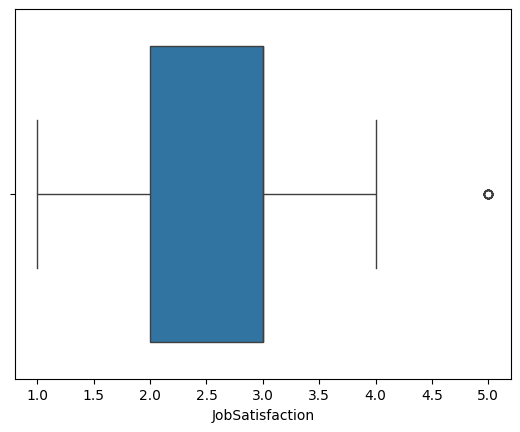

In [19]:
sns.boxplot(data["JobSatisfaction"], orient='h')
plt.show()

In [23]:
data['JobSatisfaction'].mode()

,JobSatisfaction
0,3.0


In [55]:
# Age - replace with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Salary - department wise median
data['Salary'].fillna(data.groupby('Department')['Salary'].transform('median'), inplace=True)

# JobSatisfaction - even though the data is numeric type but the nature is categorical so we use mode
data['JobSatisfaction'].fillna(data['JobSatisfaction'].mode()[0], inplace=True)

In [45]:
# missing value after treatment
data.isnull().sum()

,0
EmployeeID,0
Age,0
Department,0
Salary,0
JobSatisfaction,0
YearsAtCompany,0
PerformanceScore,0


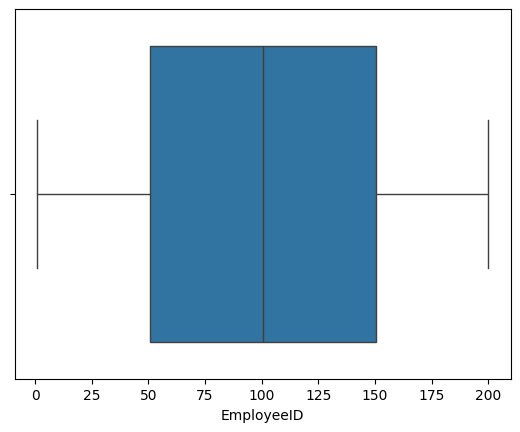

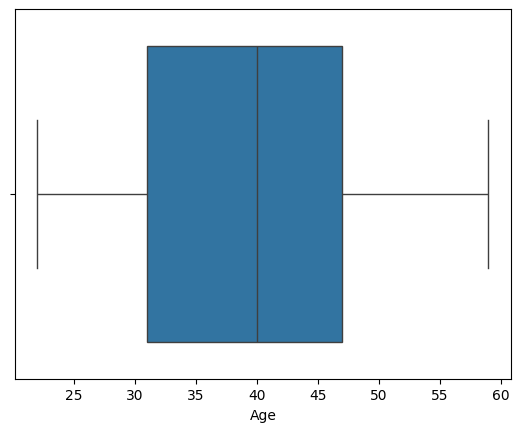

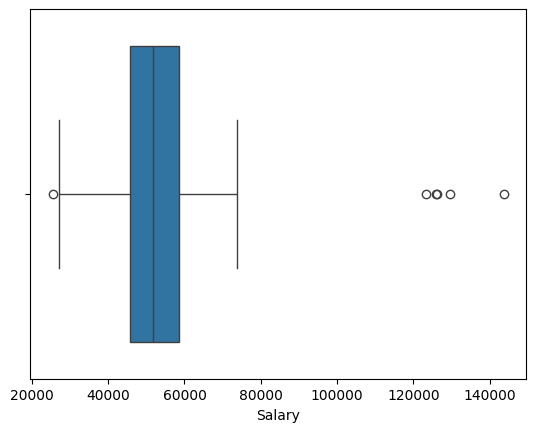

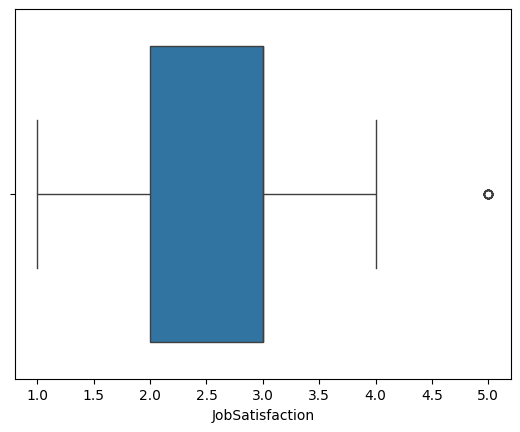

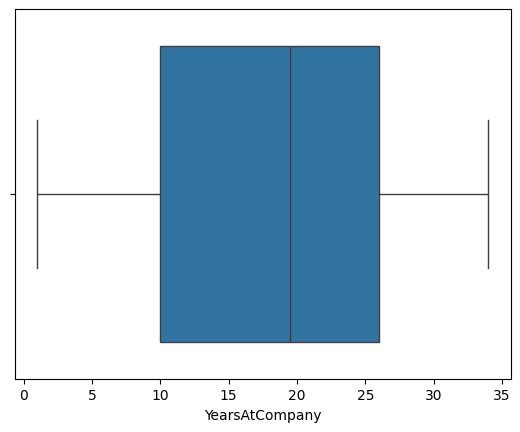

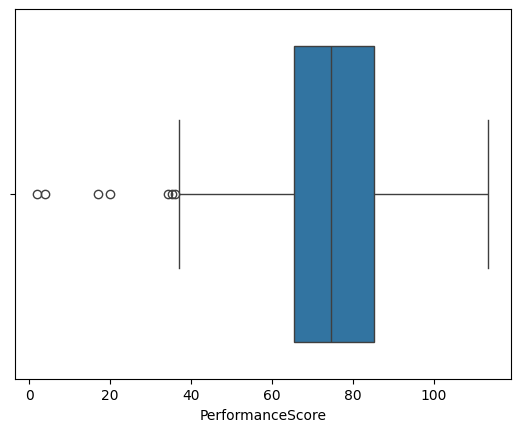

In [49]:
for cols in data.columns:
    if data[cols].dtype != 'O':     # object datatype
        sns.boxplot(data[cols], orient='h')
        plt.show()

In [56]:
# Fencing method

for cols in data.columns:
    if data[cols].dtype != 'O':
        Q1 = data[cols].quantile(0.25)
        Q3 = data[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5*IQR
        upper_fence = Q3 + 1.5*IQR
        data[cols] = data[cols].clip(lower_fence, upper_fence)

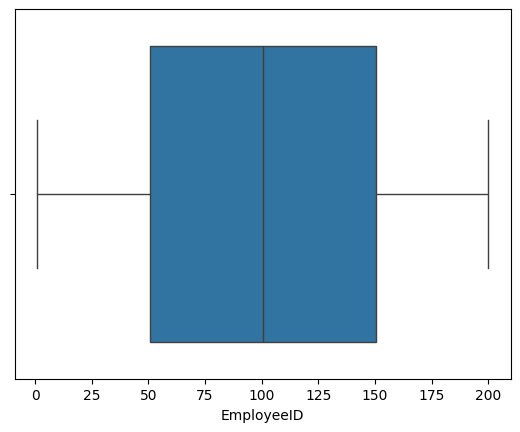

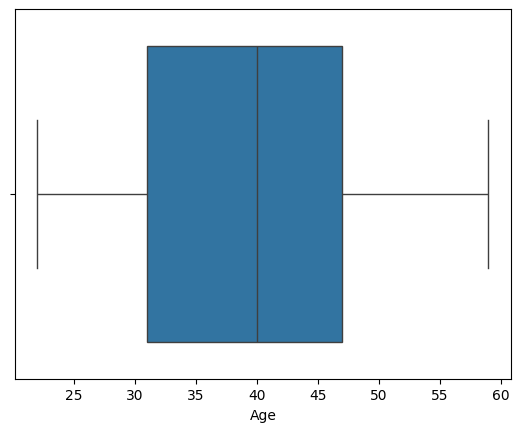

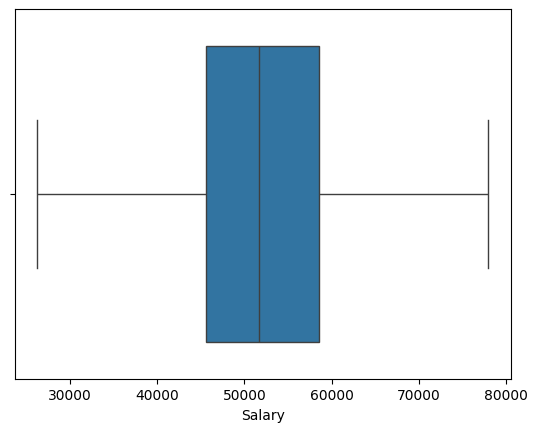

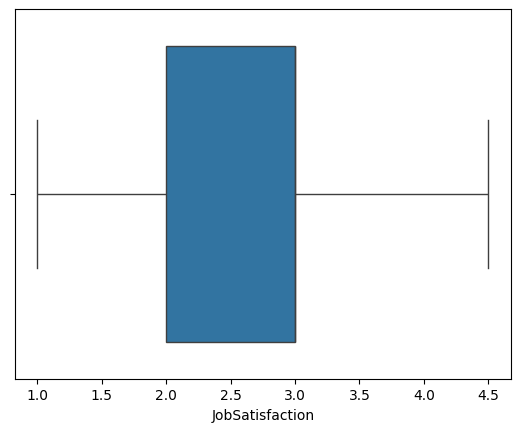

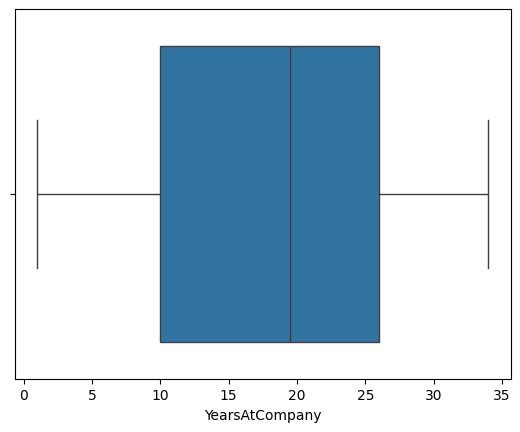

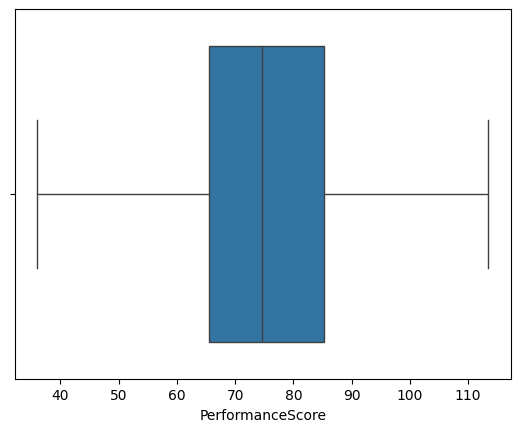

In [57]:
for cols in data.columns:
    if data[cols].dtype != 'O':     # object datatype
        sns.boxplot(data[cols], orient='h')
        plt.show()